#### Exponential Random Variables

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

In [2]:
x = np.linspace(0, 6, 100)

def exponential_rv(x, lam):
    return lam * np.exp(-lam * x)

y1 = exponential_rv(x, 0.5)
y2 = exponential_rv(x, 1.0)
y3 = exponential_rv(x, 1.5)

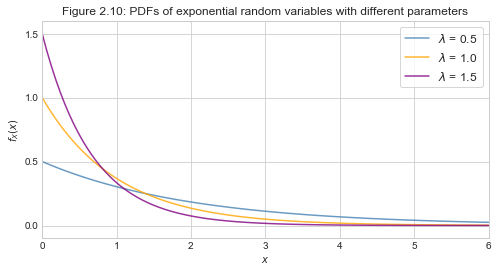

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1, c='steelblue', alpha=0.8, label='$\lambda$ = 0.5')
ax.plot(x, y2, c='orange', alpha=0.8, label='$\lambda$ = 1.0')
ax.plot(x, y3, c='purple', alpha=0.8, label='$\lambda$ = 1.5')

ax.set_xlabel('$x$')
ax.set_ylabel('$f_{X}(x)$')
ax.set_xlim(0, 6)
ax.set_ylim(-0.1, 1.6)
ax.set_yticks(np.arange(0, 2, 0.5), minor=False)

ax.set_title('Figure 2.10: PDFs of exponential random variables with different parameters')
ax.legend(loc='upper right', frameon=True, fontsize='12');

Same plot as above but using __expon__ from __scipy.stats__ module.

Links: 

* [expon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)

* [continuous random variables](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous)

In [4]:
from scipy.stats import expon

y1_expon = expon.pdf(x, scale = 1 / 0.5)
y2_expon = expon.pdf(x, scale = 1.0)
y3_expon = expon.pdf(x, scale = 1 / 1.5)

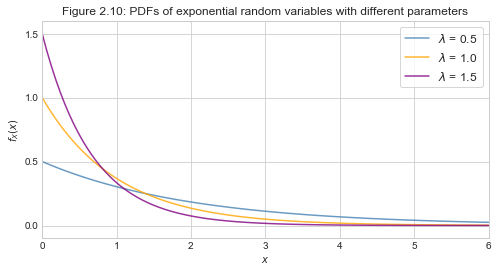

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y1_expon, c='steelblue', alpha=0.8, label='$\lambda$ = 0.5')
ax.plot(x, y2_expon, c='orange', alpha=0.8, label='$\lambda$ = 1.0')
ax.plot(x, y3_expon, c='purple', alpha=0.8, label='$\lambda$ = 1.5')

ax.set_xlabel('$x$')
ax.set_ylabel('$f_{X}(x)$')
ax.set_xlim(0, 6)
ax.set_ylim(-0.1, 1.6)
ax.set_yticks(np.arange(0, 2, 0.5), minor=False)

ax.set_title('Figure 2.10: PDFs of exponential random variables with different parameters')
ax.legend(loc='upper right', frameon=True, fontsize='12');

#### Gaussian Random Variable

In [6]:
from scipy.stats import norm

x = np.arange(-10, 10, 0.1)

y1_norm = norm(2, 1).pdf(x)
y2_norm = norm(0, 2).pdf(x)
y3_norm = norm(0, 4).pdf(x)

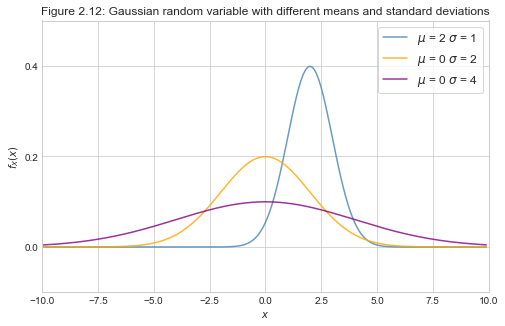

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, y1_norm, c='steelblue', alpha=0.8, label='$\mu$ = 2 $\sigma$ = 1')
ax.plot(x, y2_norm, c='orange', alpha=0.8, label='$\mu$ = 0 $\sigma$ = 2')
ax.plot(x, y3_norm, c='purple', alpha=0.8, label='$\mu$ = 0 $\sigma$ = 4')

ax.set_xlabel('$x$')
ax.set_ylabel('$f_{X}(x)$')
ax.set_xlim(-10, 10)
ax.set_ylim(-0.1, 0.5)
ax.set_yticks(np.arange(0, 0.5, 0.2), minor=False)

ax.set_title('Figure 2.12: Gaussian random variable with different means and standard deviations')
ax.legend(loc='upper right', frameon=True, fontsize='12');

In [8]:
import pandas as pd

heights = pd.read_csv('data/davis.csv')
heights.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [9]:
heights.describe()

,Unnamed: 0,weight,height,repwt,repht
count,200.000000,200.000000,200.000000,183.000000,183.000000
mean,100.500000,65.800000,170.520000,65.622951,168.497268
std,57.879185,15.095009,8.977896,13.776669,9.467048
min,1.000000,39.000000,148.000000,41.000000,148.000000
25%,50.750000,55.000000,164.000000,55.000000,160.500000
50%,100.500000,63.000000,169.500000,63.000000,168.000000
75%,150.250000,74.000000,177.250000,73.500000,175.000000
max,200.000000,166.000000,197.000000,124.000000,200.000000


In [10]:
x_heights = heights['height'].sort_values().ravel()
y_norm_pdf = norm(heights['height'].mean(), heights['height'].std()).pdf(x_heights)

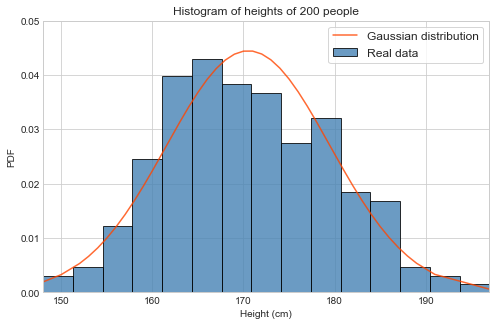

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x_heights, y_norm_pdf, c='orangered', alpha=0.8, label='Gaussian distribution')
ax.hist(x_heights, normed=True, bins=15, color='steelblue', ec='k', alpha=0.8, label='Real data');

ax.set_xlabel('Height (cm)')
ax.set_ylabel('PDF')
ax.set_xlim(x_heights.min(), x_heights.max())
ax.set_ylim(0, 0.05)

ax.set_title('Histogram of heights of 200 people')
ax.legend(loc='upper right', frameon=True, fontsize='12');